In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


Bad key "text.kerning_factor" on line 4 in
/Users/haoran/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Set parameters
N = 2000  # Initial effective population size
p_init = 0.2 # Starting allele frequency of A
ngen = 200 # number of generation simulated
bottleneck_generations_start = 100  
bottleneck_generations_end = 110
bottleneck_size = 100  # Size of population during the bottleneck
replicates = 5 # Number of population simulated

In [3]:
def drift_sim_with_bottleneck(N, p, ngen, bottleneck_generations_start,bottleneck_generaitons_end, bottleneck_size):
    # initialize p
    p_init = p
    pvec = [p]
    for gen in range(ngen):
        # Apply bottleneck if within bottleneck generations
        if (gen > bottleneck_generations_start) & (gen < bottleneck_generations_end):
            N_bottleneck = bottleneck_size
        else:
            N_bottleneck = N
        
        # Genetic drift within the population
        pA = np.random.binomial(2*N_bottleneck, p)
        p = pA / (2*N_bottleneck)
        pvec.append(p)
    
    return pvec


## Genetic drift with possible population bottleneck

The graph shows allele frequency of A for multiple replicated population over time. The population size abruptly shrink while in the red rectangle (you can adjust the population size during bottleneck). You can also change the total number of replicated population and the starting allele frequency of A

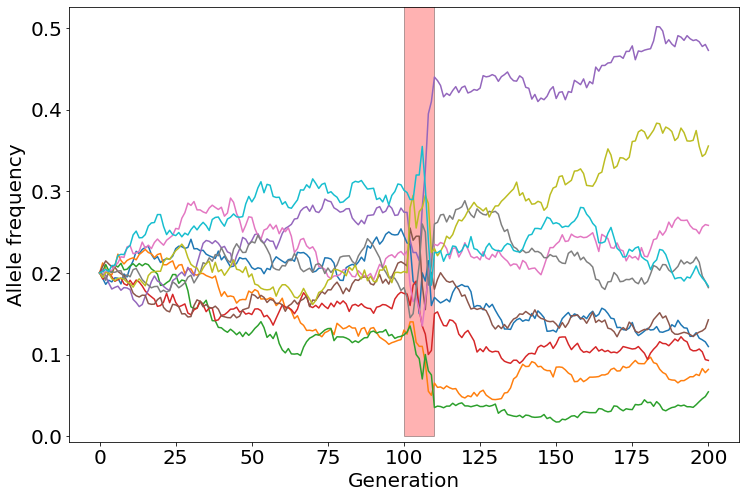

In [4]:
matplotlib.rc('font', size=20)

plt.figure(figsize=(12, 8))
for i in range(replicates):
    plt.plot(np.linspace(0, ngen, ngen+1), drift_sim_with_bottleneck(N, p_init, ngen, bottleneck_generations_start,bottleneck_generations_end, bottleneck_size)) 
    plt.plot(np.linspace(0, ngen, ngen+1), drift_sim_with_bottleneck(N, p_init, ngen, bottleneck_generations_start,bottleneck_generations_end, bottleneck_size)) 


rect = Rectangle((bottleneck_generations_start, 0), bottleneck_generations_end - bottleneck_generations_start, 1, linewidth=1, edgecolor='black', facecolor='r', alpha=0.3)
plt.gca().add_patch(rect)

plt.xlabel("Generation")
plt.ylabel("Allele frequency")
plt.show()